In [1]:
# IMPORTING FUTURE
import numpy as np
import pandas as pd
import seaborn
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
#FILTER WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [72]:
PATH = 'external_media/'
WAV = 'howl.wav'

y, sr = librosa.load(PATH+WAV, duration=30)
ipd.Audio(y, rate=sr)

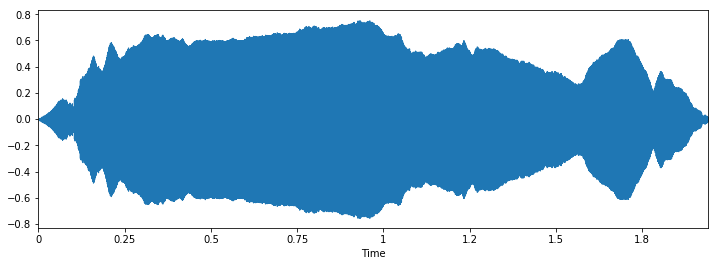

In [73]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(y.astype('float'), sr=sr)
plt.show()

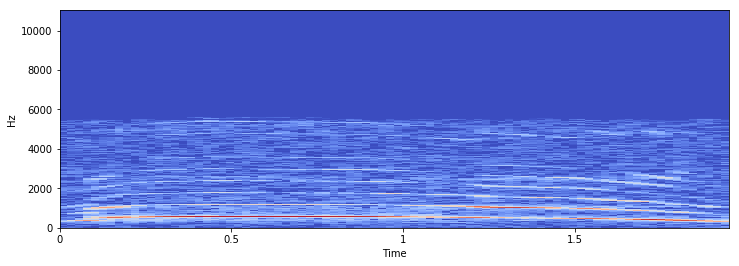

In [74]:
X = librosa.stft(y.astype('float'))
X.shape
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12,4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

### CHANGE PITCH AND SPEED

In [75]:
y_pitch_speed = y.copy()
length_change = np.random.uniform(low=0.8, high=1)
speed_fac = 1.0 / length_change
print("resample length_change = ", length_change)
tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
y_pitch_speed *= 0
y_pitch_speed[0:minlen] = tmp[0:minlen]
ipd.Audio(y_pitch_speed, rate=sr)

resample length_change =  0.8708982879864025


### CHANGE PITCH

In [76]:
y_pitch = y.copy()
bins_per_octave = 12
pitch_pm = 2
pitch_change =  pitch_pm * 2 * (np.random.uniform())
print("pitch_change = ", pitch_change)
y_pitch = librosa.effects.pitch_shift(y_pitch.astype('float64'),
                                     sr, n_steps=pitch_change,
                                     bins_per_octave=bins_per_octave)
ipd.Audio(y_pitch, rate=sr)

pitch_change =  0.050891100823436286


### CHANGE SPEED

In [77]:
y_speed = y.copy()
speed_change = np.random.uniform(low=0.8, high=1.3)
print("speed_change = ",speed_change)
tmp = librosa.effects.time_stretch(y_speed.astype('float64'), speed_change)
minlen = min(y_speed.shape[0], tmp.shape[0])

y_speed *= 0
y_speed[0:minlen] = tmp[0:minlen]
ipd.Audio(y_speed, rate=sr)

speed_change =  1.2209547062624984


### VALUE AUGMENTATION

In [79]:
y_aug = y.copy()
dyn_change = np.random.uniform(low=1.5,high=3)
print("dyn_change = ",dyn_change)
y_aug = y_aug * dyn_change
print(y_aug[:25])
print(y[:25])
ipd.Audio(y_aug, rate=sr)

dyn_change =  2.267384407331532
[ 1.61130520e-05  1.12985814e-04  4.06129084e-06 -1.22291633e-04
  4.84146403e-06  1.11845678e-04  9.71854934e-06 -1.44106365e-04
 -6.62023604e-06  2.04635435e-04 -1.17727450e-06 -2.01808842e-04
  1.52677990e-06  1.98221824e-04  7.22162031e-06 -2.60035857e-04
 -8.51860659e-06  2.89710151e-04 -2.15868818e-06 -3.20484949e-04
  1.33365274e-05  3.99516692e-04  5.67349707e-06 -4.58690774e-04
 -1.44427650e-05]
[ 7.1064496e-06  4.9830905e-05  1.7911789e-06 -5.3935113e-05
  2.1352639e-06  4.9328064e-05  4.2862384e-06 -6.3556217e-05
 -2.9197679e-06  9.0251764e-05 -5.1922143e-07 -8.9005131e-05
  6.7336617e-07  8.7423126e-05  3.1850007e-06 -1.1468539e-04
 -3.7570194e-06  1.2777284e-04 -9.5206104e-07 -1.4134566e-04
  5.8819001e-06  1.7620157e-04  2.5022212e-06 -2.0229953e-04
 -6.3697912e-06]


### ADD DISTRIBUTION NOISE

In [81]:
y_noise = y.copy()
# you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
noise_amp = 0.005*np.random.uniform()*np.amax(y_noise)
y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])
ipd.Audio(y_noise, rate=sr)

### RANDOM SHIFTING

In [83]:
y_shift = y.copy()
timeshift_fac = 0.2 * 2 *(np.random.uniform() -0.5)
print("timeshift_fac = ",timeshift_fac)
start = int(y_shift.shape[0] * timeshift_fac)
print(start)
if (start > 0):
    y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
else:
    y_shift = np.pad(y_shift,(0,-start),mode='constant')[0:y_shift.shape[0]]
ipd.Audio(y_shift, rate=sr)

timeshift_fac =  -0.1301044674836956
-5570


### HPSS

In [89]:
y_hpss = librosa.effects.hpss(y.astype('float64'))
print(y_hpss[1][:10])
print(y[:10])
ipd.Audio(y_hpss[1], rate=sr)

[-7.12449895e-05 -2.89895592e-04 -6.63341564e-04 -6.34919042e-04
 -2.10053498e-04  1.95712261e-04  5.07209011e-04  8.86987863e-04
  1.21077540e-03  1.19024754e-03]
[ 7.1064496e-06  4.9830905e-05  1.7911789e-06 -5.3935113e-05
  2.1352639e-06  4.9328064e-05  4.2862384e-06 -6.3556217e-05
 -2.9197679e-06  9.0251764e-05]
